# Early Tries

In [ ]:
# API highly restricted and my use case is inaccessible without paid subscription
import tweepy
import dotenv
import pandas as pd

dotenv.load_dotenv()

# Authentication credentials
consumer_key = dotenv.get_key(dotenv.find_dotenv(), 'CONSUMER_KEY')
consumer_secret = dotenv.get_key(dotenv.find_dotenv(), 'CONSUMER_SECRET')
access_token = dotenv.get_key(dotenv.find_dotenv(), 'ACCESS_TOKEN')
access_secret = dotenv.get_key(dotenv.find_dotenv(), 'ACCESS_SECRET')

# Authenticate
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

# Collect tweets based on keyword
query = 'python'
tweets = tweepy.Cursor(api.search_tweets, q=query, lang='en', tweet_mode='extended').items(100)

# Store tweets as text
tweet_texts = [tweet.full_text for tweet in tweets]

# Load into DataFrame for analysis
df = pd.DataFrame(tweet_texts, columns=['tweet'])

# Example: basic statistics
print(df['tweet'].str.len().describe())


In [ ]:
# If you store 'created_at':
tweets_data = [{'text': tweet.full_text, 'created_at': tweet.created_at} for tweet in tweets]
df = pd.DataFrame(tweets_data)

# Aggregating number of tweets per day
df['date'] = pd.to_datetime(df['created_at']).dt.date
daily_counts = df.groupby('date').size()
daily_counts.plot(kind='bar', figsize=(10, 5), title='Number of Tweets per Day')


In [ ]:
import tweepy
import dotenv
import pandas as pd

dotenv.load_dotenv()

# Load your Bearer Token from .env
bearer_token = dotenv.get_key(dotenv.find_dotenv(), 'BEARER_TOKEN')

# Authenticate with Tweepy Client
client = tweepy.Client(bearer_token=bearer_token)

# Search recent tweets with query
query = 'python lang:en -is:retweet'
tweets = client.search_recent_tweets(query=query, tweet_fields=['text'], max_results=100)

# Extract tweet texts
tweet_texts = [tweet.text for tweet in tweets.data] if tweets.data else []

# Load into DataFrame for analysis
df = pd.DataFrame(tweet_texts, columns=['tweet'])

# Example: basic statistics
print(df['tweet'].str.len().describe())


In [5]:
df.head()

,tweet
0,@svpino python is the gateway for math nerds t...
1,Stack &amp; Queue from #striver started now\n#...
2,Hello students\nData science course in Indore ...
3,@23_python @DimaZeniuk CONGRATULATIONS!!!\nThi...
4,Great Monty Python skit “We always look on the...


In [8]:
df.to_csv('tweets_data.csv')

# Main Implementation

<Axes: title={'center': 'Number of Tweets per Day'}, xlabel='date'>

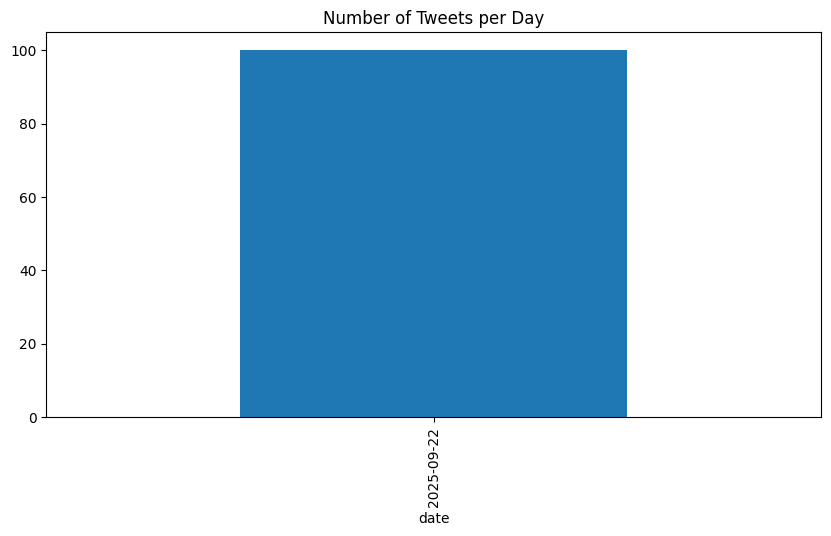

In [9]:
import tweepy
import dotenv
import pandas as pd

dotenv.load_dotenv()

bearer_token = dotenv.get_key(dotenv.find_dotenv(), 'BEARER_TOKEN')

client = tweepy.Client(bearer_token=bearer_token)

query = 'python lang:en -is:retweet'
tweets = client.search_recent_tweets(query=query, tweet_fields=['created_at'], max_results=100)

tweets_data = [{'text': tweet.text, 'created_at': tweet.created_at} for tweet in tweets.data]

df = pd.DataFrame(tweets_data)

df['date'] = pd.to_datetime(df['created_at']).dt.date
daily_counts = df.groupby('date').size()

daily_counts.plot(kind='bar', figsize=(10, 5), title='Number of Tweets per Day')


In [10]:
df.head()

,text,created_at,date
0,@svpino Python is slow for what it was not int...,2025-09-22 06:33:12+00:00,2025-09-22
1,(Inviting a Monty Python style p1ss take here....,2025-09-22 06:32:42+00:00,2025-09-22
2,Python is a beautiful language. \n\nPython may...,2025-09-22 06:32:28+00:00,2025-09-22
3,@MrMissionCtl Sure! I'd love to code whatever'...,2025-09-22 06:31:35+00:00,2025-09-22
4,learning python is a pain in the ass,2025-09-22 06:31:21+00:00,2025-09-22


In [11]:
df.to_csv("timed_tweets.csv")

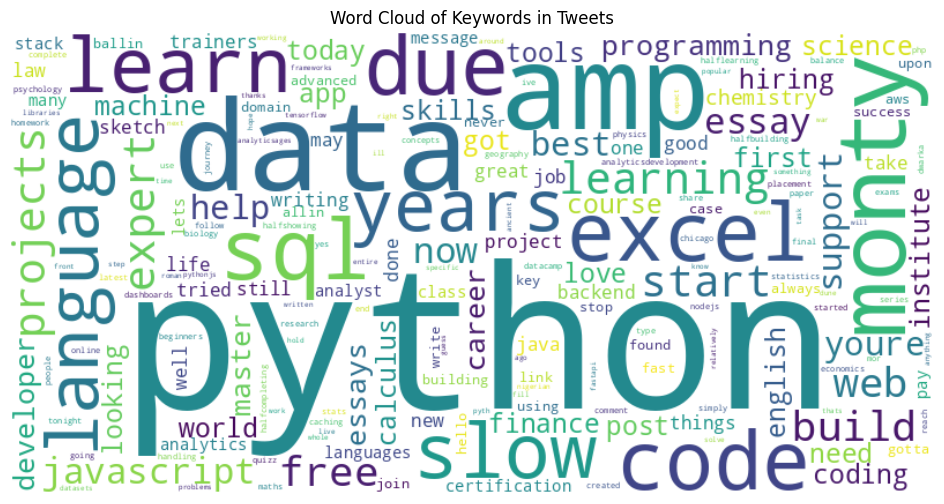

In [12]:
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Combine all tweet texts
all_text = ' '.join(df['text'].tolist()).lower()

# Basic text cleaning to remove URLs, mentions, hashtags (optionally keep hashtags if keywords)
cleaned_text = re.sub(r"(https?://\S+)|(@\w+)|(#\w+)|[^a-zA-Z\s]", "", all_text)

# Tokenize by splitting on whitespace
tokens = cleaned_text.split()

# Remove common English stopwords
stopwords = set(STOPWORDS)
filtered_words = [word for word in tokens if word not in stopwords and len(word) > 2]

# Count word frequencies
word_counts = Counter(filtered_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Keywords in Tweets')
plt.show()
